In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
plt.style.use('seaborn')
plt.style.use('dark_background')

# Loading the dataset

In [126]:
population = pd.read_csv('Weights/population.csv')
moreThan50k = pd.read_csv('Weights/more_than_50k.csv')

# Handling population.csv file

## 1. Preprocessing

In [127]:
population.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [128]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [129]:
population.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


### 1.1 Replacing missing data with NaN

In [130]:
population = population.replace(' ?', np.nan)

In [131]:
columns = []
percentageOfNan = []
colsToRemove = []
for i in population.columns:
    columns.append(i)
    percentageOfNan.append(population[i].isnull().sum()*100/population.shape[0])
    if percentageOfNan[-1] > 40:
        colsToRemove.append(i)

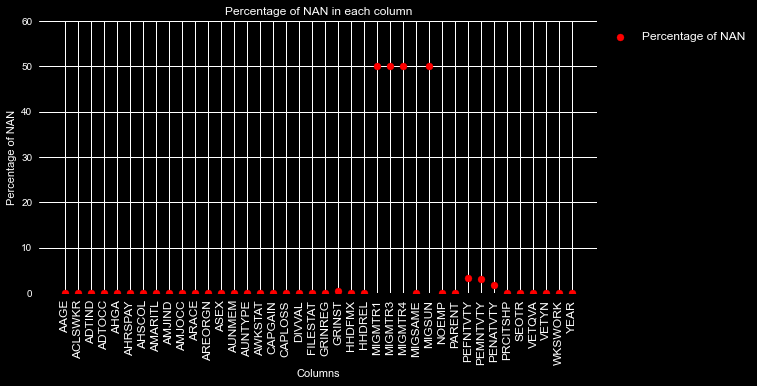

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(columns, percentageOfNan, color='red', marker='o', label='Percentage of NAN')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, 60, 10)
plt.xlabel('Columns')
plt.ylabel('Percentage of NAN')
plt.title('Percentage of NAN in each column')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


In [133]:
len(population.columns)

40

In [134]:
colsToRemove

['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [138]:
preprocessedPopulation = population.drop(colsToRemove, axis=1)

In [139]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 2. Feature Analysis

### 2.1 Histogram of values of each feature

AAGE


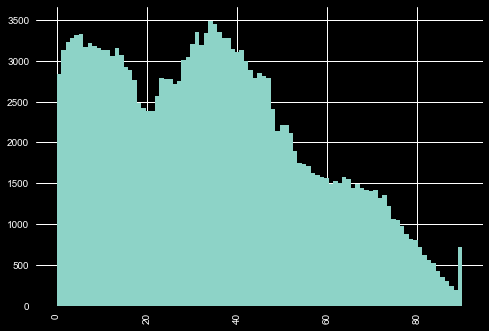

ACLSWKR


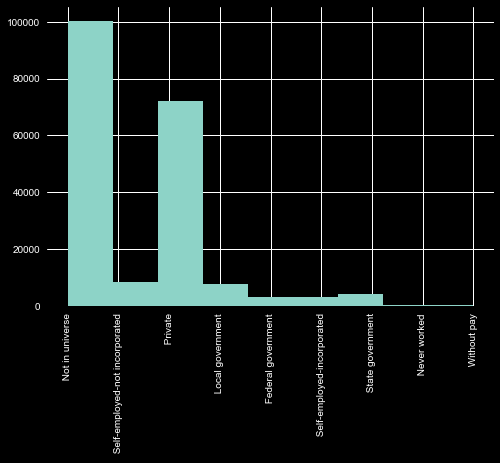

ADTIND


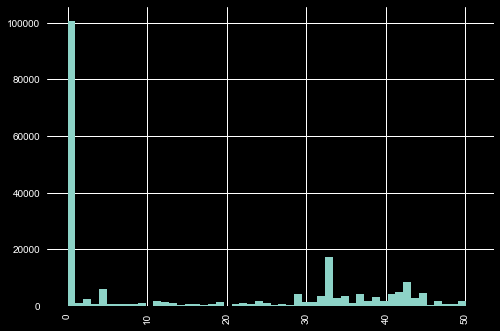

ADTOCC


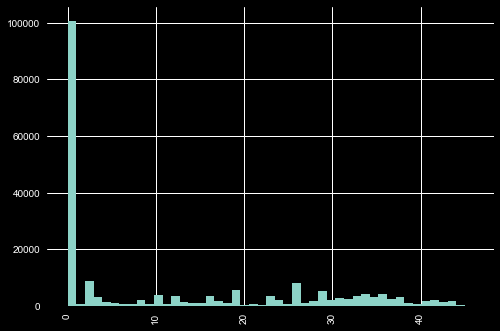

AHGA


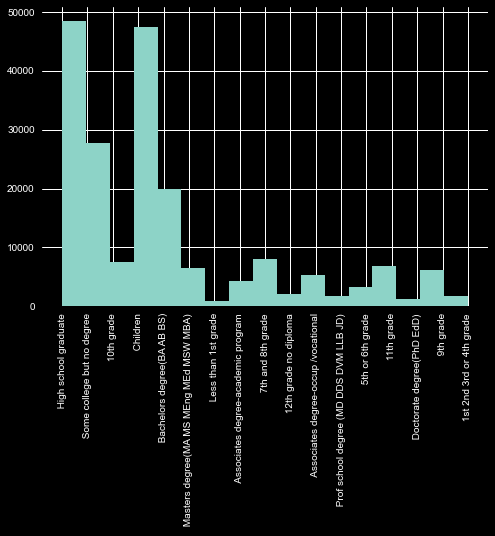

AHRSPAY


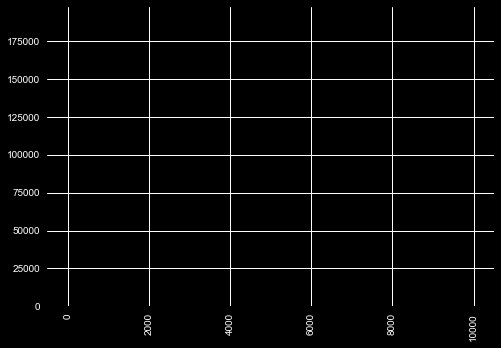

AHSCOL


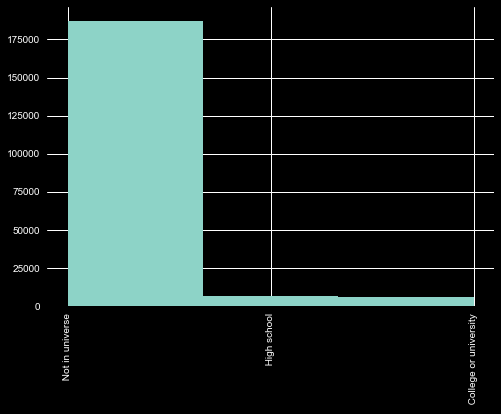

AMARITL


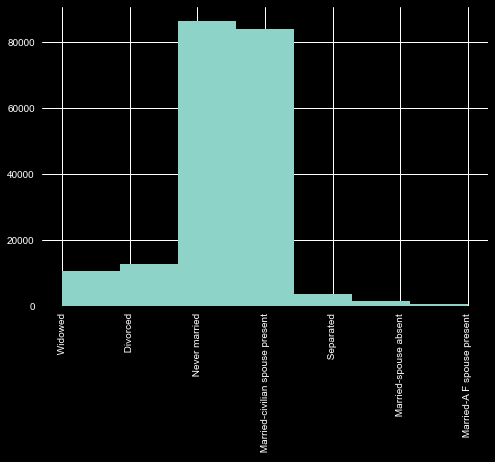

AMJIND


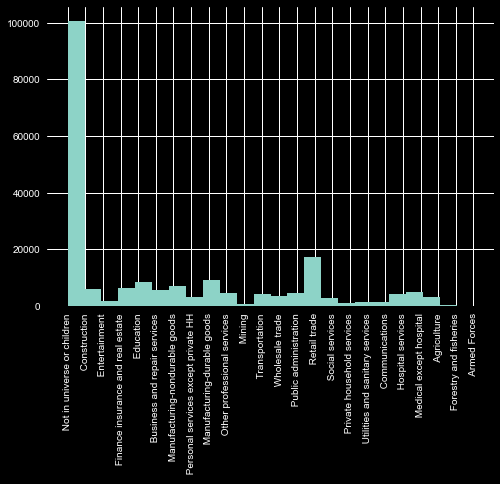

AMJOCC


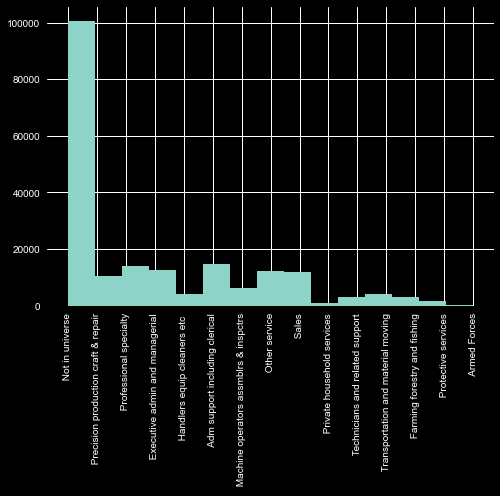

ARACE


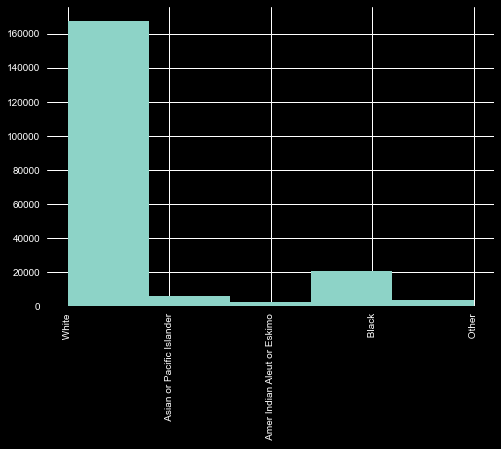

AREORGN


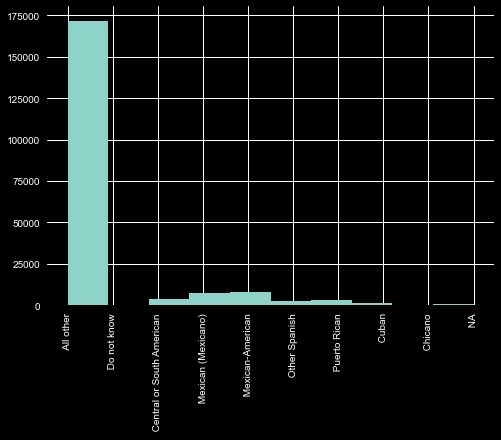

ASEX


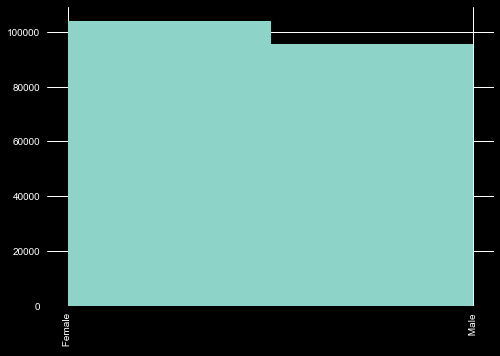

AUNMEM


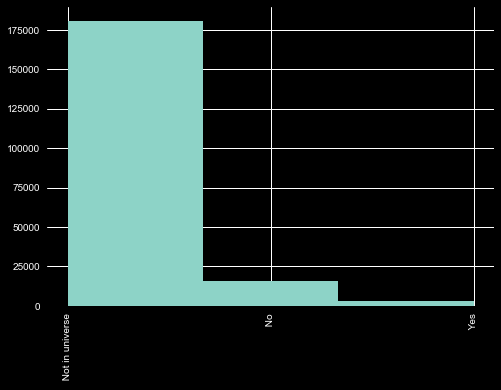

AUNTYPE


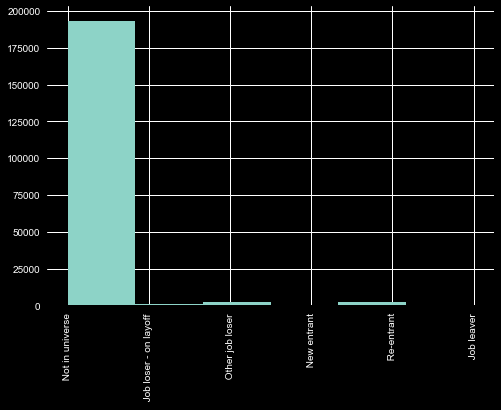

AWKSTAT


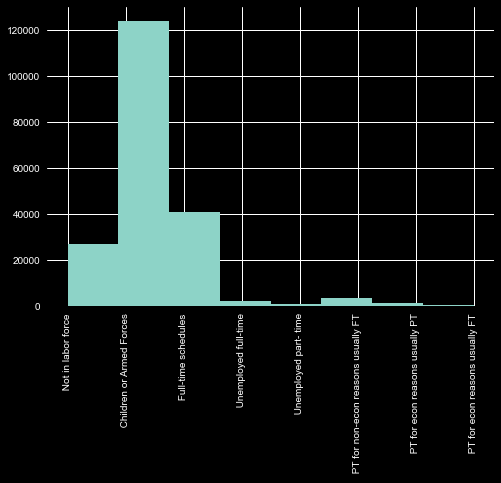

CAPGAIN


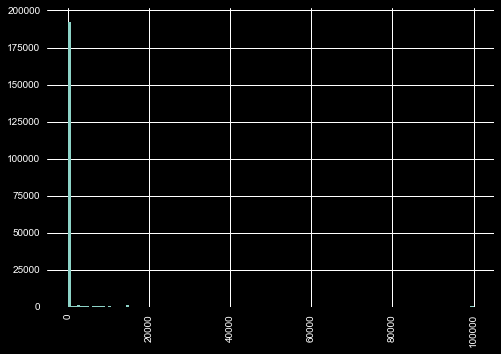

CAPLOSS


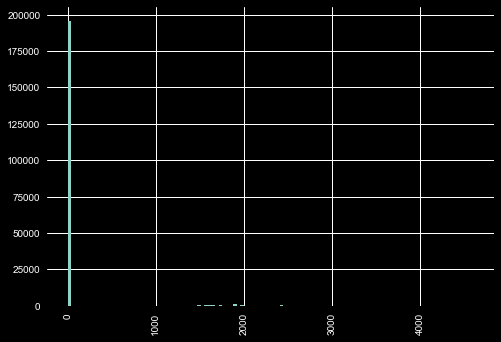

DIVVAL


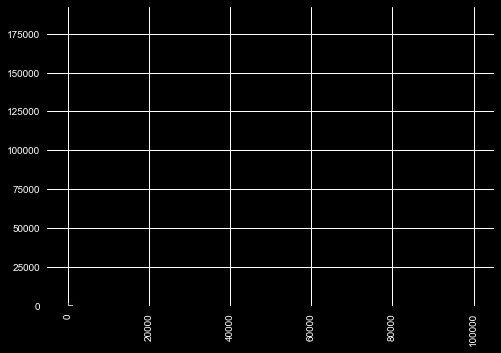

FILESTAT


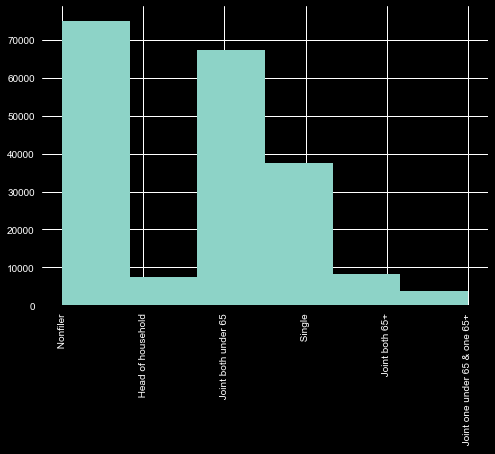

GRINREG


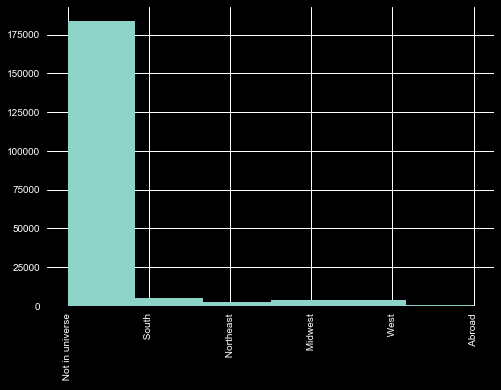

GRINST


TypeError: 'value' must be an instance of str or bytes, not a float

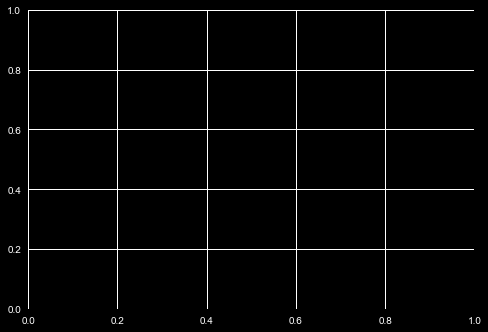

In [159]:
for i in preprocessedPopulation.columns:
    print(i)
    plt.hist(preprocessedPopulation[i], bins=len(preprocessedPopulation[i].unique()), label=i)
    plt.xticks(rotation=90, fontsize=10)
    plt.show()

In [158]:
preprocessedPopulation['GRINST'].unique()

array([' Not in universe', ' Arkansas', ' Utah', ' Michigan',
       ' Minnesota', ' Alaska', ' Kansas', ' Indiana', nan,
       ' Massachusetts', ' New Mexico', ' Nevada', ' Tennessee',
       ' Colorado', ' Abroad', ' Kentucky', ' California', ' Arizona',
       ' North Carolina', ' Connecticut', ' Florida', ' Vermont',
       ' Maryland', ' Oklahoma', ' Oregon', ' Ohio', ' South Carolina',
       ' Texas', ' Montana', ' Wyoming', ' Georgia', ' Pennsylvania',
       ' Iowa', ' New Hampshire', ' Missouri', ' Alabama',
       ' North Dakota', ' New Jersey', ' Louisiana', ' West Virginia',
       ' Delaware', ' Illinois', ' Maine', ' Wisconsin', ' New York',
       ' Idaho', ' District of Columbia', ' South Dakota', ' Nebraska',
       ' Virginia', ' Mississippi'], dtype=object)

In [161]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 